In [14]:
import os
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
from silq.tools import fit_toolbox
qc.data.data_set.DataSet.default_io.base_location = 'E:\EWJN\data'
loc_provider = qc.data.location.FormatLocation(fmt='{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

<IPython.core.display.Javascript object>


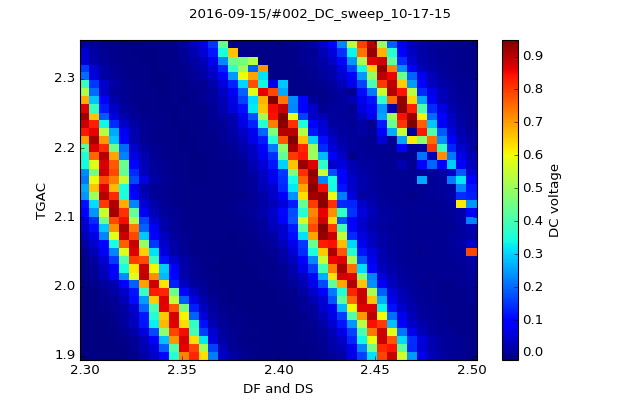

In [3]:
data = qc.load_data('2016-09-15/#002_DC_sweep_10-17-15')
plotQ = qc.MatPlot(data.DC_voltage)

There seems to be another shift close to the transition for this coulomb peak. I will move to a different peak

<IPython.core.display.Javascript object>


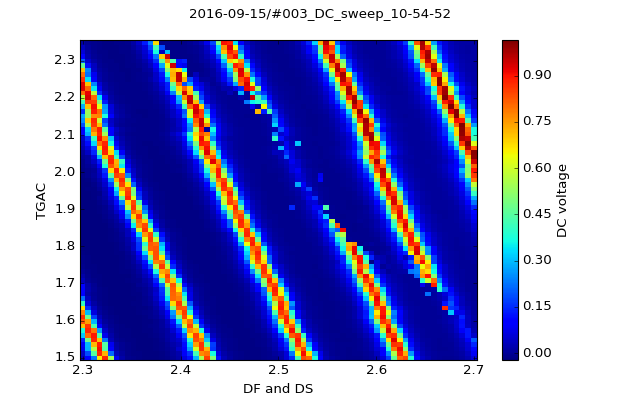

In [6]:
data = qc.load_data('2016-09-15/#003_DC_sweep_10-54-52')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


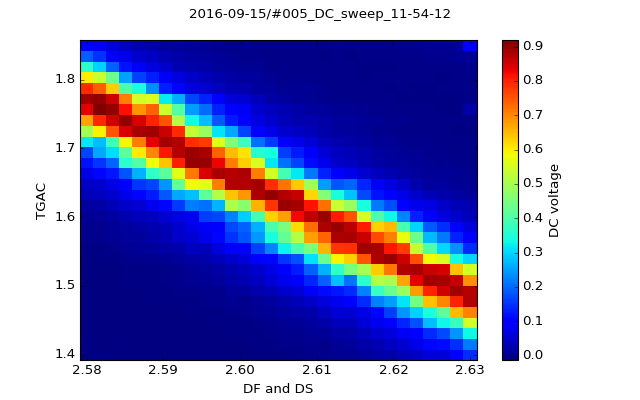

In [9]:
data = qc.load_data('2016-09-15/#005_DC_sweep_11-54-12')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


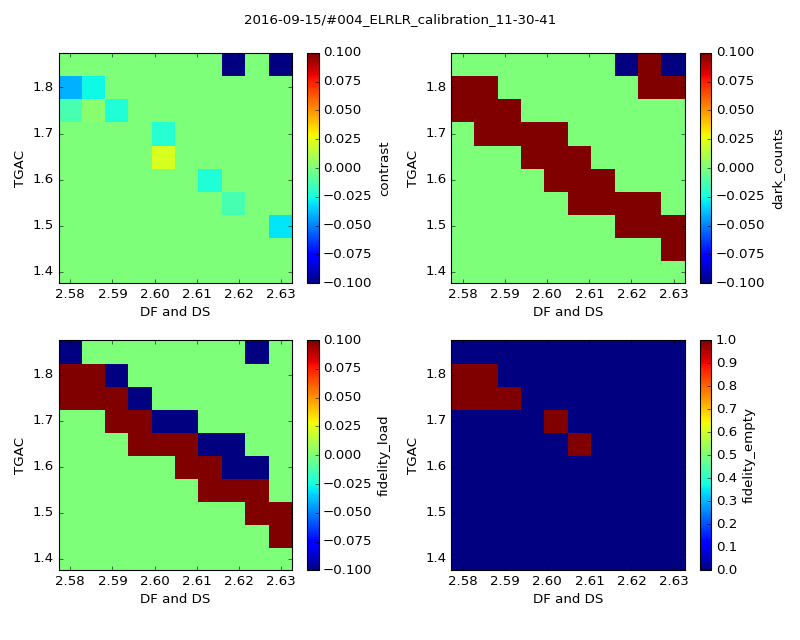

In [7]:
data = qc.load_data('2016-09-15/#004_ELRLR_calibration_11-30-41')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


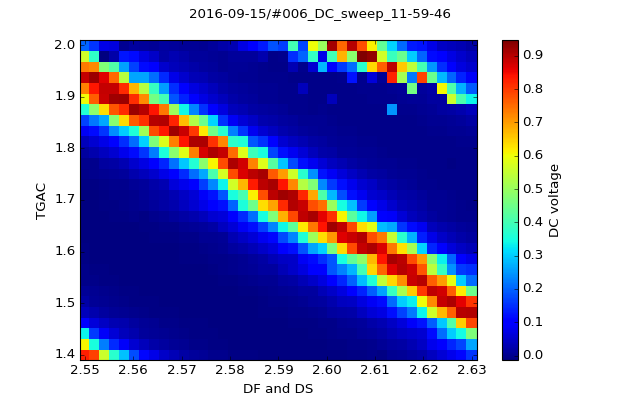

In [10]:
data = qc.load_data('2016-09-15/#006_DC_sweep_11-59-46')
plotQ = qc.MatPlot(data.DC_voltage)

The donor has clearly shifted. Redoing large DC scan

<IPython.core.display.Javascript object>


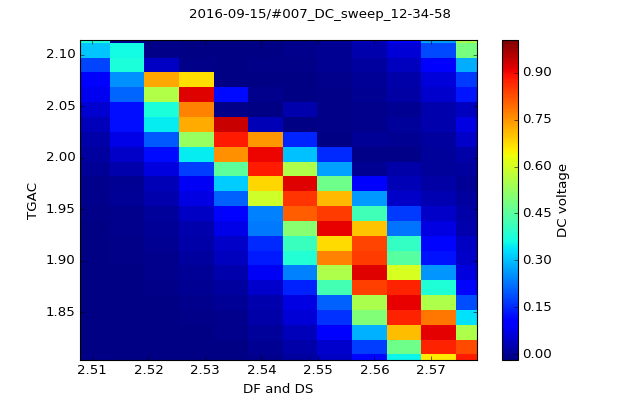

In [11]:
data = qc.load_data('2016-09-15/#007_DC_sweep_12-34-58')
plotQ = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


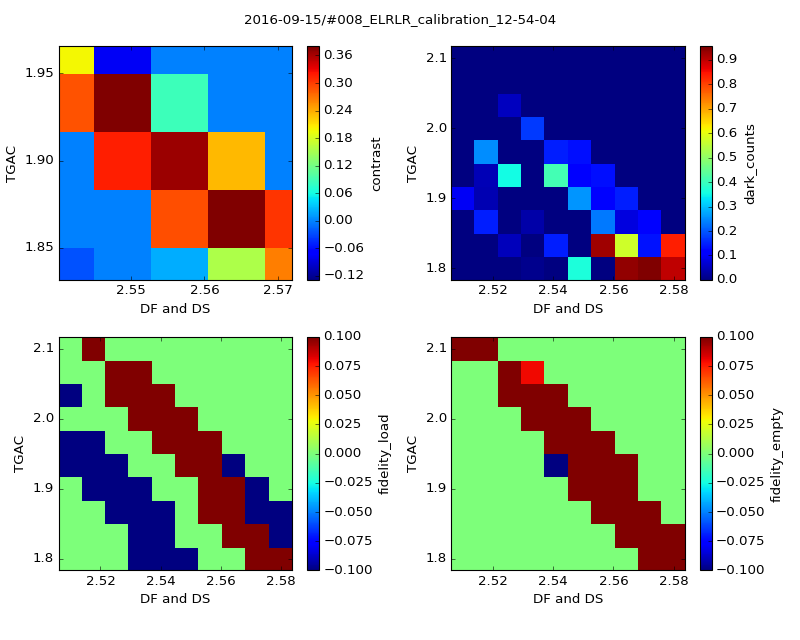

In [12]:
data = qc.load_data('2016-09-15/#008_ELRLR_calibration_12-54-04')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


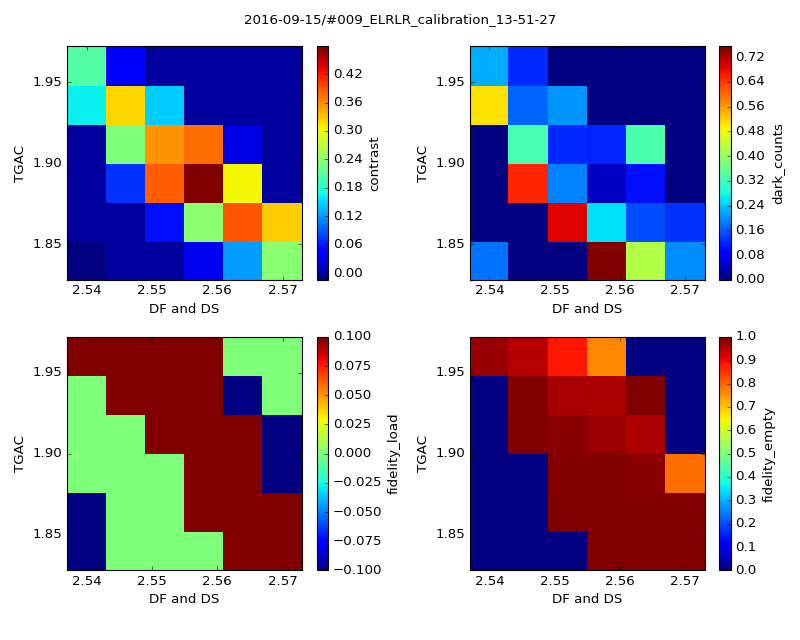

In [13]:
data = qc.load_data('2016-09-15/#009_ELRLR_calibration_13-51-27')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


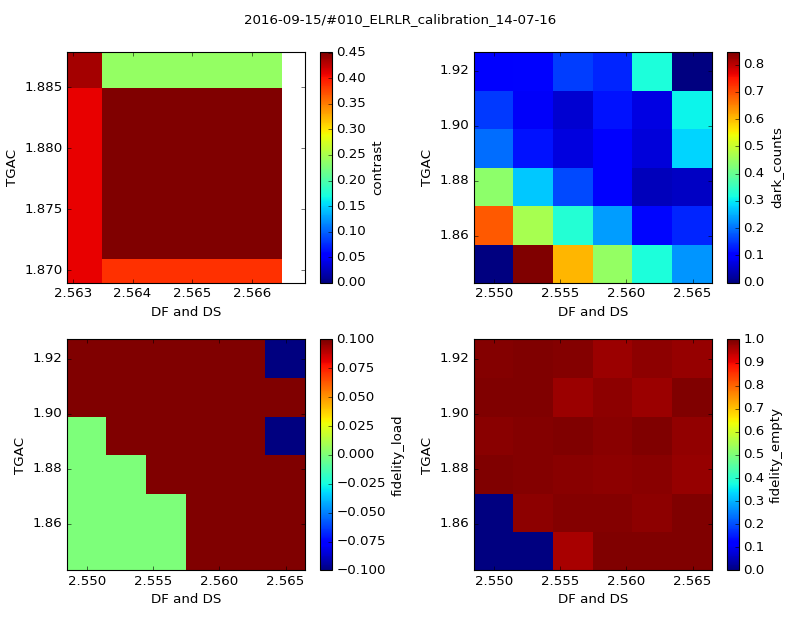

In [14]:
data = qc.load_data('2016-09-15/#010_ELRLR_calibration_14-07-16')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Operating point:

TGAC(1.877)
DF_DS(2.565)

fidelity_empty: 0.987
fidelity_load: 0.880
fidelity_read: 0.800
up_proportion: 0.492
dark_counts: 0.045
contrast: 0.447

<IPython.core.display.Javascript object>


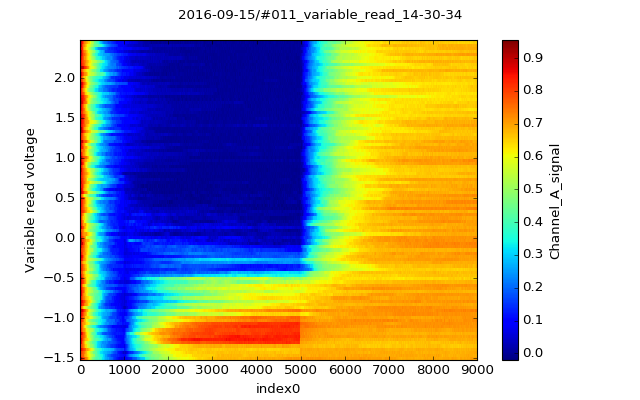

In [2]:
data = qc.load_data('2016-09-15/#011_variable_read_14-30-34')
plot = qc.MatPlot(data.Channel_A_signal)

In [3]:
data = qc.load_data('2016-09-15/#012_T1_data_14-52-32')

Number of successful sweeps: 12


<IPython.core.display.Javascript object>


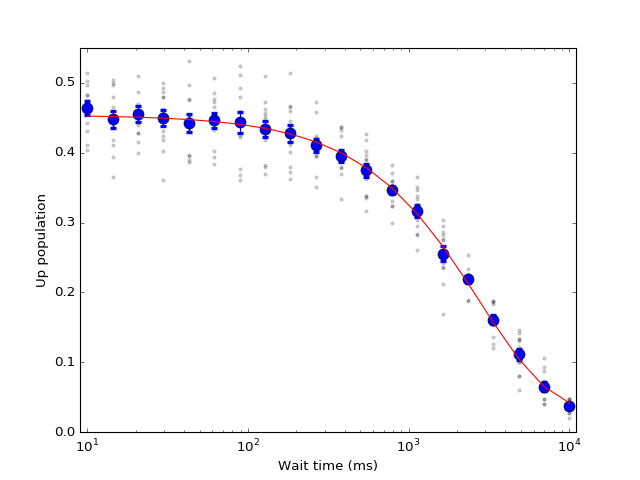

T1 time: 2783 ms
[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 20
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -204.329
    Bayesian info crit = -201.342
[[Variables]]
    tau:         2782.55193 +/- 92.21021 (3.31%) (init= 3345.436)
    amplitude:   0.42376451 +/- 0.005428 (1.28%) (init= 0.4481199)
    offset:      0.03023103 +/- 0.005561 (18.40%) (init= 0.03673398)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.943 
    C(tau, offset)               = -0.836 
    C(tau, amplitude)            =  0.704 



In [15]:
data = qc.load_data('2016-09-15/#012_T1_data_14-52-32')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion_3_0_0])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion_3_0_0[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)
vals_std_mean_sorted = vals_std_sorted/np.sqrt(max_idx)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_mean_sorted, 
                           marker='o', linestyle='',ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
    
# Fitting 
mod = fit_toolbox.ExponentialFit()
result=mod.perform_fit(T1_wait_times_sorted,vals_mean_sorted)#, weights=1/np.power(vals_std_mean_sorted,2))
print('T1 time: {:.0f} ms'.format(result.best_values['tau']))
plt.plot(T1_wait_times_sorted, result.best_fit, 'r-')

ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.55])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')
print(result.fit_report())